In [ ]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Carregando dataset
data = 'equipment_anomaly_data.csv'
df = pd.read_csv(data)

In [4]:
# Exibindo as primeiras linhas do dataframe para visualizar a estrutura dos dados
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [5]:
# Verificando informações gerais do dataframe, como tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [8]:
# Estatísticas descritivas para entender a distribuição das variáveis numéricas
df.describe().round(2)

,temperature,pressure,vibration,humidity,faulty
count,7672.00,7672.00,7672.00,7672.00,7672.0
mean,70.92,35.74,1.61,50.02,0.1
std,16.20,10.38,0.73,11.84,0.3
min,10.27,3.62,-0.43,10.22,0.0
25%,62.78,29.49,1.17,42.61,0.0
50%,70.16,35.23,1.53,50.02,0.0
75%,77.57,41.16,1.92,57.34,0.0
max,149.69,79.89,4.99,89.98,1.0


In [10]:
# Verificando a quantidade de valores nulos em cada coluna
df.isnull().sum()

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

In [12]:
# Verificando se há linhas duplicadas
df.duplicated().sum()

np.int64(0)

In [13]:
# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

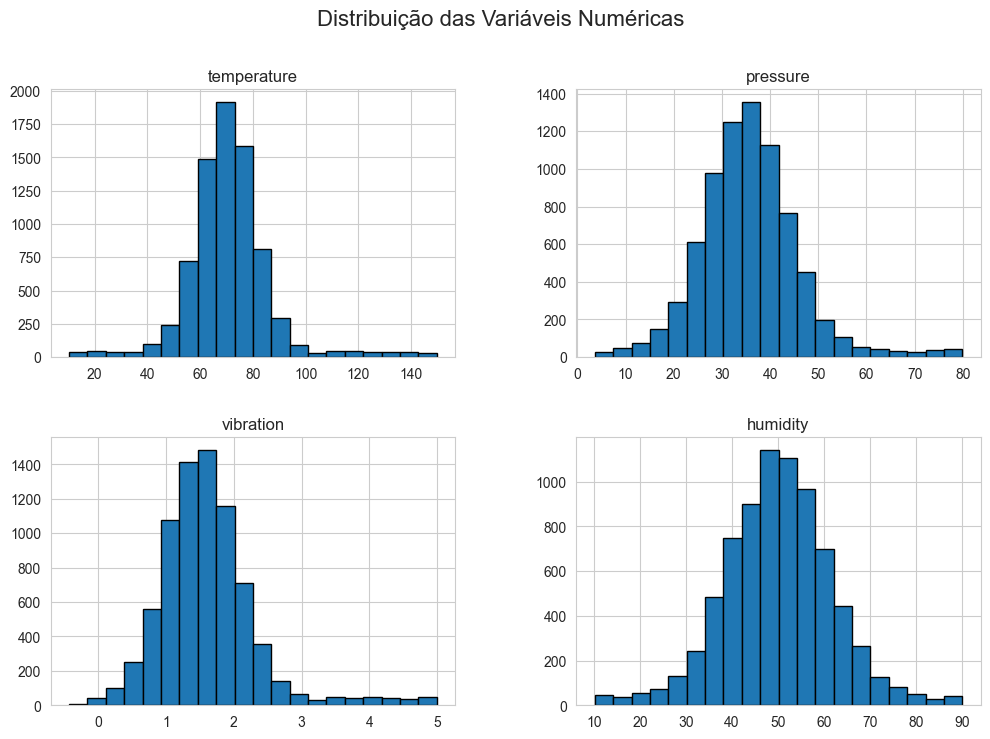

In [38]:
# Selecionando apenas as colunas numéricas para a matriz de correlação
df_numerico = ['temperature', 'pressure', 'vibration', 'humidity']
# Criando histogramas para visualizar a distribuição das variáveis numéricas
df[df_numerico].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.show()

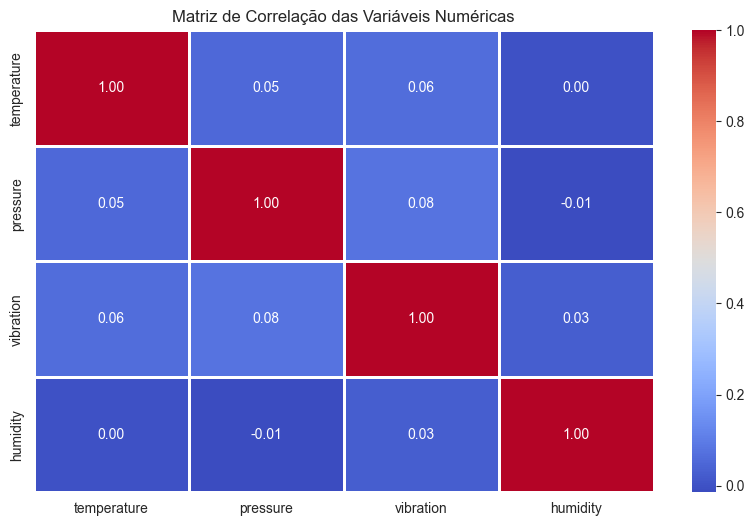

In [34]:
# Criando o mapa de calor com as colunas numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[df_numerico].corr(), annot=True, cmap="coolwarm", fmt=".2f",  linewidths=1)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

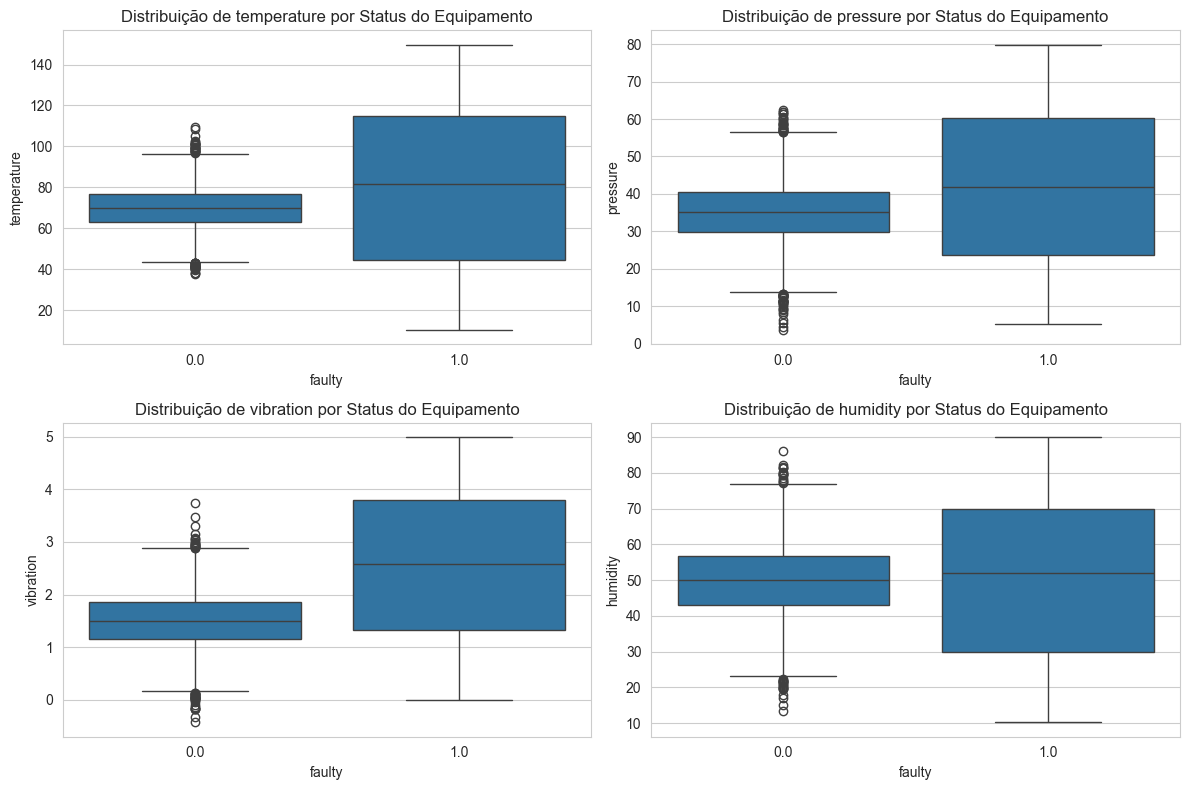

In [ ]:
# Criando boxplots para comparar as variáveis numéricas entre equipamentos com e sem falha
plt.figure(figsize=(12, 8))

variaveis_numericas = ['temperature', 'pressure', 'vibration', 'humidity']

for i, coluna in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["faulty"], y=df[coluna]) 
    plt.title(f"Distribuição de {coluna} por Status do Equipamento")
    
plt.tight_layout()
plt.show()



C:\Users\guilh\AppData\Local\Temp\ipykernel_15632\3061005691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=falhas_por_localizacao.index, y=falhas_por_localizacao.values, palette="Reds_r")


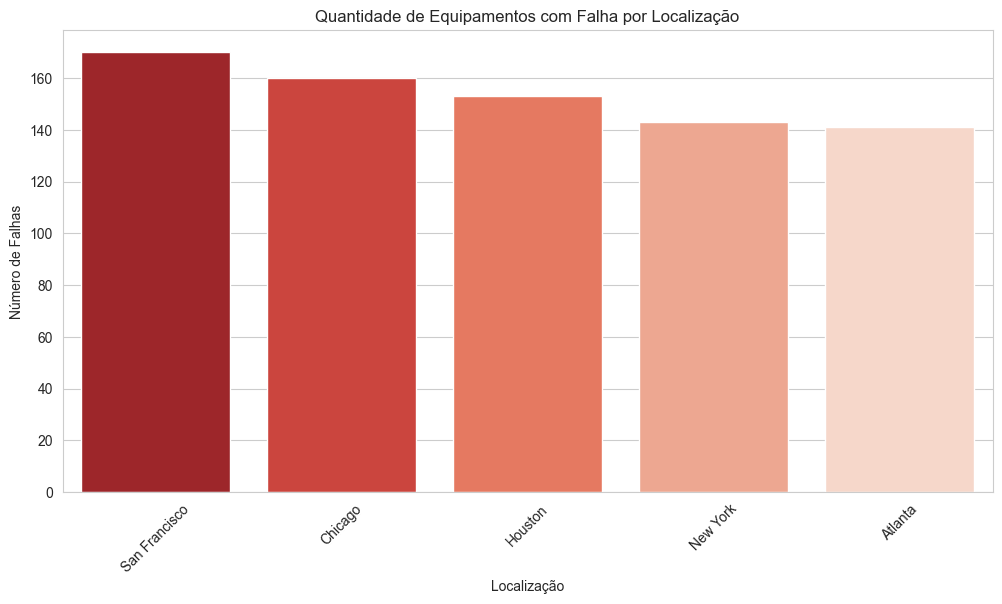

In [45]:
# Contando o número de falhas por localização
falhas_por_localizacao = df[df["faulty"] == 1]["location"].value_counts()

# Criando um gráfico de barras para visualizar as falhas por localização
plt.figure(figsize=(12, 6))
sns.barplot(x=falhas_por_localizacao.index, y=falhas_por_localizacao.values, palette="Reds_r")
plt.xticks(rotation=45)  # Rotaciona os nomes das cidades para melhor visualização
plt.xlabel("Localização")
plt.ylabel("Número de Falhas")
plt.title("Quantidade de Equipamentos com Falha por Localização")
plt.show()

C:\Users\guilh\AppData\Local\Temp\ipykernel_15632\1186918619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=falhas_por_equipamento.index, y=falhas_por_equipamento.values, palette="Blues_r")


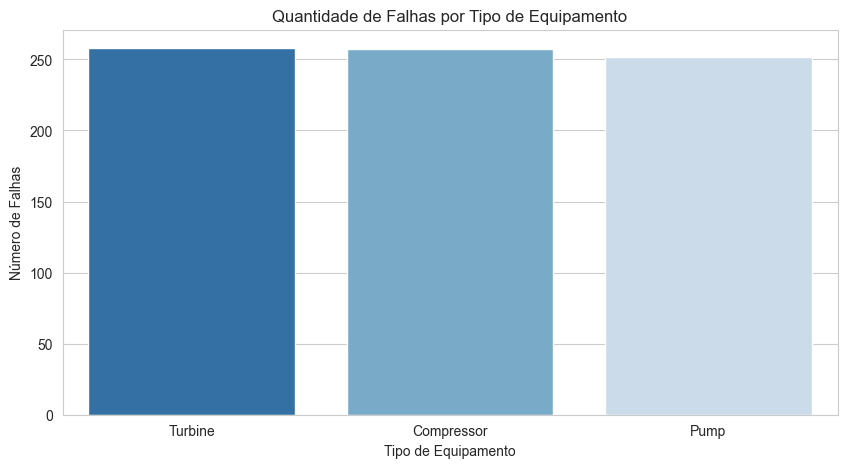

In [46]:
# Contando o número de falhas por tipo de equipamento
falhas_por_equipamento = df[df["faulty"] == 1]["equipment"].value_counts()

# Criando um gráfico de barras para visualizar as falhas por equipamento
plt.figure(figsize=(10, 5))
sns.barplot(x=falhas_por_equipamento.index, y=falhas_por_equipamento.values, palette="Blues_r")
plt.xlabel("Tipo de Equipamento")
plt.ylabel("Número de Falhas")
plt.title("Quantidade de Falhas por Tipo de Equipamento")
plt.show()


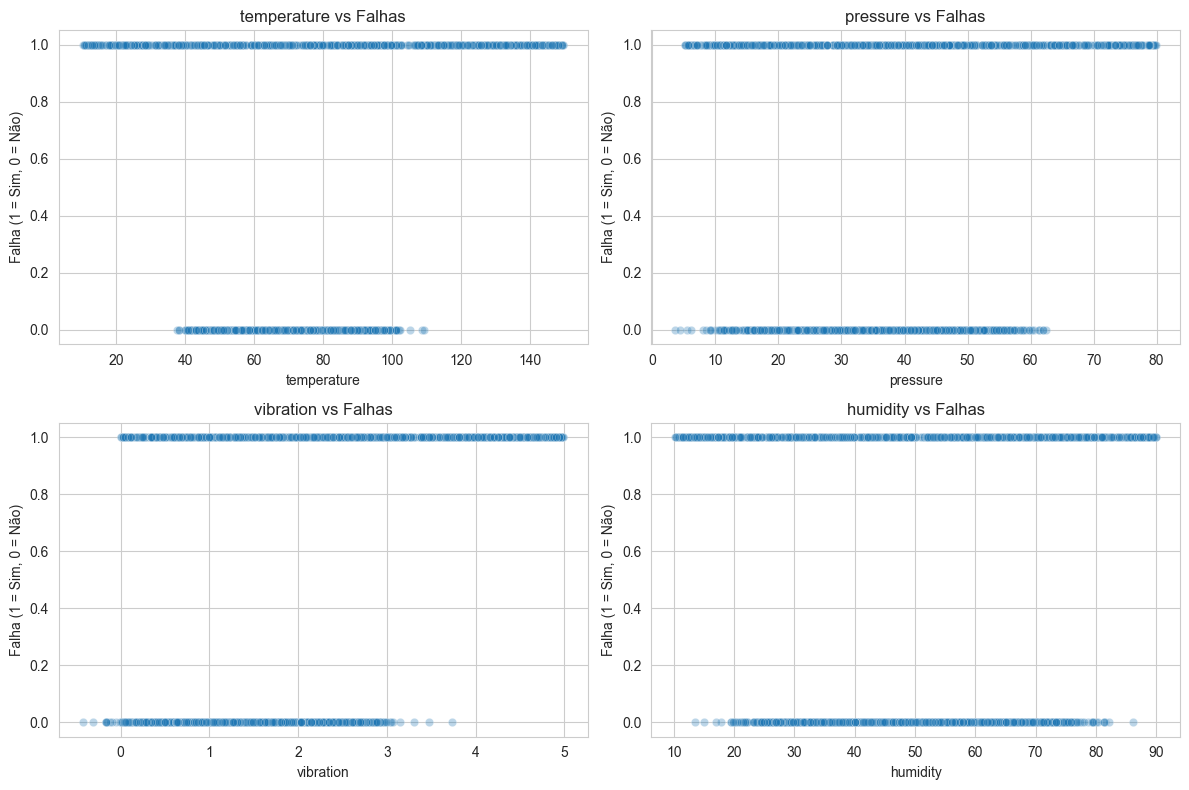

In [48]:
# Criando gráficos de dispersão para visualizar padrões
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(variaveis_numericas, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[coluna], y=df["faulty"], alpha=0.3)
    plt.title(f"{coluna} vs Falhas")
    plt.xlabel(coluna)
    plt.ylabel("Falha (1 = Sim, 0 = Não)")

plt.tight_layout()
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separando a variável alvo
X = df.drop(columns=["faulty"])
y = df["faulty"]

# Convertendo variáveis categóricas em números
label_enc = LabelEncoder()
X["equipment"] = label_enc.fit_transform(X["equipment"])
X["location"] = label_enc.fit_transform(X["location"])

# Normalizando as variáveis numéricas
scaler = StandardScaler()
X[["temperature", "pressure", "vibration", "humidity"]] = scaler.fit_transform(X[["temperature", "pressure", "vibration", "humidity"]])

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificando os tamanhos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6137, 6), (1535, 6), (6137,), (1535,))

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Lista de modelos
modelos = {
    "Regressão Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Treinando e avaliando os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Modelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Modelo: Regressão Logística
Acurácia: 0.9401
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1382
         1.0       0.98      0.41      0.57       153

    accuracy                           0.94      1535
   macro avg       0.96      0.70      0.77      1535
weighted avg       0.94      0.94      0.93      1535

--------------------------------------------------
Modelo: Random Forest
Acurácia: 0.9831
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1382
         1.0       0.97      0.86      0.91       153

    accuracy                           0.98      1535
   macro avg       0.98      0.93      0.95      1535
weighted avg       0.98      0.98      0.98      1535

--------------------------------------------------
Modelo: XGBoost
Acurácia: 0.9811
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1382
         1.0      

c:\Users\guilh\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:21:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


C:\Users\guilh\AppData\Local\Temp\ipykernel_15632\72167473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="Blues_r")


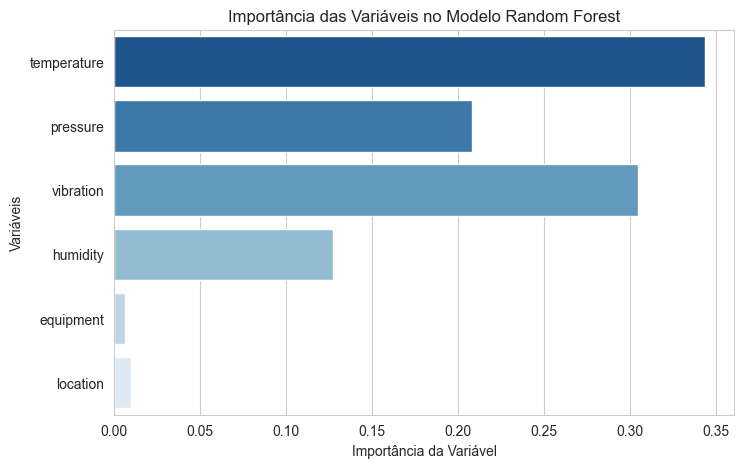

In [55]:
# Obtendo a importância das variáveis
importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_
features = X_train.columns

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette="Blues_r")
plt.xlabel("Importância da Variável")
plt.ylabel("Variáveis")
plt.title("Importância das Variáveis no Modelo Random Forest")
plt.show()

